In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import skillsnetwork
from sklearn.model_selection import train_test_split
%matplotlib inline

In [17]:
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv','kc_house_data_NaN.csv')
df = pd.read_csv("kc_house_data_NaN.csv", header=0)
df.head()

Saved as 'kc_house_data_NaN.csv'


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
# 1 Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.

df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [123]:
# 2 Drop the columns
# df.dropna(subset=["price"], axis=0, inplace=True)
# df.dropna(subset=[['Unnamed:0', 'id']], axis=1, inplace = True)

df.drop(["Unnamed: 0", "id"], axis=1, inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [20]:
# missing values for the columns

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [21]:
# replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms' using the method.

mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace=True)


In [22]:
# replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms' using the method.

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean, inplace=True)

In [23]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [109]:
#3 Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.

df['floors'].value_counts().to_frame()


,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: title={'center': 'price'}, xlabel='waterfront'>

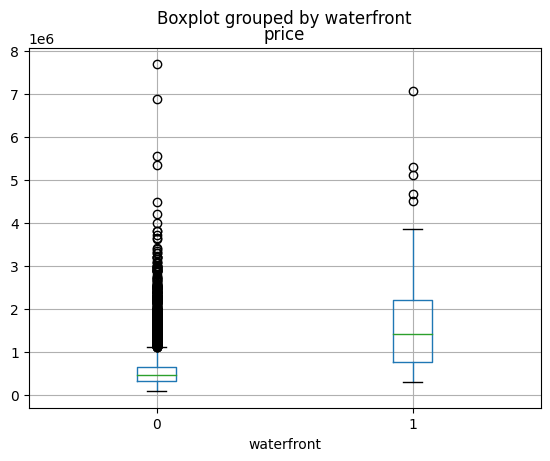

In [122]:
# 4 Use the function boxplot in the seaborn library  to  determine whether houses with a waterfront view have more price outliers.

# sns.boxplot(x=df["waterfront"])

df.boxplot(column='price', by='waterfront')

<Axes: xlabel='sqft_above', ylabel='price'>

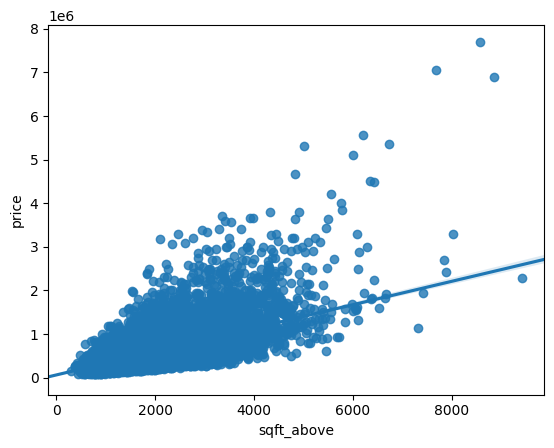

In [48]:
# 5 determine if the feature "sqft_above" is negatively or positively correlated with price.

sns.regplot(x=df["sqft_above"], y=df["price"])

In [49]:
#use the Pandas method corr() to find the feature other than price that is most correlated with price.

df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [61]:
#Model development
X = df[['long']]
Y = df['price']

print(X.shape)
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

(21613, 1)


0.00046769430149007363

In [75]:
# 6 Fit a linear regression model to predict the 'price' using the feature'sqft_living' then calculate the R^2. 
# Take a screenshot of your code and the value of the R^2.

y_data = df['price']
x_data = df.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

# print(x_train.shape)
lm=LinearRegression()
lm.fit(x_train[['sqft_living']], y_train)

#calculate the R2 on the test data
print("test R2 score:", lm.score(x_test[['sqft_living']], y_test))
print("train R2 score:", lm.score(x_train[['sqft_living']], y_train))


test R2 score: 0.48489043226442785
train R2 score: 0.4938445479924307


In [82]:
# 7 Fit a linear regression model to predict the <code>'price'</code> using the list of features:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

lm2 = LinearRegression()
lm2.fit(x_train[features], y_train)

#calculate the R2 on the test data
print("test R2 score:", lm2.score(x_test[features], y_test))
print("train R2 score:", lm2.score(x_train[features], y_train))

test R2 score: 0.6446075823325215
train R2 score: 0.6593075977848544


In [100]:
# 8 Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list 'features', and calculate the R^2:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
x_pipe = df[features]
x_pipe = x_pipe.astype(float)

y_pipe = df['price']

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_pipe, y_pipe)

ypipe = pipe.predict(x_pipe)

lm3 = LinearRegression()
lm3.fit(x_pipe, y_pipe)

print("R2 score:", lm3.score(x_pipe, y_pipe))


R2 score: 0.6576564952403063


In [107]:
# 9 Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, 
# and calculate the R^2 using the test data.


from sklearn.linear_model import Ridge

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
x_train_ridge = x_train[features]
y_train_ridge = y_train

x_test_ridge = x_test[features]
y_test_ridge = y_test

RigeModel = Ridge(alpha = 0.1)
RigeModel.fit(x_train_ridge, y_train_ridge)

test_score, train_score = RigeModel.score(x_test_ridge, y_test_ridge), RigeModel.score(x_train_ridge, y_train_ridge)
# train_score = RigeModel.score(x_ridge, y_ridge)
    
print("Train Score: ", train_score)
print("Test Score: ", test_score)

Train Score:  0.6593041620299805
Test Score:  0.6445590215123738


In [108]:
# 10 Perform a second order polynomial transform on both the training data and testing data. 
# Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1

from sklearn.linear_model import Ridge

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
pr=PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)


test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

print("Train Score: ", train_score)
print("Test Score: ", test_score)

Train Score:  0.737225618357566
Test Score:  0.7477812516222371
